In [1]:
from pathlib import *
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import xml.etree.ElementTree as ET

In [241]:
img_path=Path("J:\\Users\Berners_Lukas\LEO\yolov5\\50_45\man_slip\\3mm\eps5\\New_folder\crop")
list(img_path.glob('**\*.xml'))

[WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/man_slip/3mm/eps5/New_folder/crop/pano_4kv_slip_events002_stitch_c000_r000.xml'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/man_slip/3mm/eps5/New_folder/crop/pano_4kv_slip_events002_stitch_c000_r003.xml'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/man_slip/3mm/eps5/New_folder/crop/pano_4kv_slip_events002_stitch_c000_r006.xml'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/man_slip/3mm/eps5/New_folder/crop/pano_4kv_slip_events002_stitch_c001_r000.xml'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/man_slip/3mm/eps5/New_folder/crop/pano_4kv_slip_events002_stitch_c002_r005.xml'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/man_slip/3mm/eps5/New_folder/crop/pano_4kv_slip_events002_stitch_c002_r006.xml'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/man_slip/3mm/eps5/New_folder/crop/pano_4kv_slip_events002_stitch_c003_r000.xml'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/

In [137]:
img_path

WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/man_slip/head/eps5/panos/crop')

In [242]:
def sel_window(sample,imshape):
    centerx=int(float(sample.y.values[0])*imshape[1])
    print(centerx)
    print(imshape)
    y1=centerx-int(float(sample.s_y.values[0])*imshape[1]/2)
    y2=centerx+int(float(sample.s_y.values[0])*imshape[1]/2)
    centery=int(float(sample.x.values[0])*imshape[1])
    x1=centery-int(float(sample.s_x.values[0])*imshape[1]/2)
    x2=centery+int(float(sample.s_x.values[0])*imshape[1]/2)
    return [x1,x2,y1,y2]
# plt.imshow(img[x1:x2,y1:y2])


In [243]:
###convert txt files to a single txt file
import glob
import os
import numpy as np
from pathlib import *
# res=50/3072
# path = '/work/mz071159/quasi-in-situ/50_45_leo/3mm/dmg_2023_07_19/output/' #don't forget / at end
# main_path ="
# files = sorted(glob.glob(path + '*.txt'))
# names = []
listli=[]
for name in img_path.glob('**\*.xml'):
    # with open(name,'r') as f:
        # print(size[c])
        tree = ET.parse(name)
        root = tree.getroot()
        fp=root[2].text
        df_info=pd.read_xml(name,xpath='object')
        df_bnd=pd.read_xml(name,xpath='object/bndbox')
        df=pd.merge(df_info,df_bnd,left_index=True,right_index=True)
        df['parent_path']=Path(fp).parent.stem
        df['path']=Path(fp).stem
        # for line in f:
        #     strip_lines=line.strip()
        #     listli=strip_lines.split()
        #     #print(listli)
        #     # listli[1] = listli[1]
        #     # listli[2] = listli[2]
        #     # listli[3] = listli[3]
        #     # listli[4] = listli[4]
        listli.append(df)
            # m=listl.append(listli)
df=[]
df=pd.concat(listli)
df=df.reset_index()

In [227]:
name

WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/man_slip/head/eps5/panos/crop/pano_4kv_slip_events0000_stitch_upper_c010_r003.xml')

In [130]:
df_0=dm_df[dm_df['type']=='0']
df_0=df_0.reset_index()
df_2=dm_df[dm_df['type']=='2']
df_2=df_2.reset_index()

NameError: name 'dm_df' is not defined

In [210]:
sample=df_0.sample()
img_p=sample.folder.values
img=io.imread(img_p[0].parents[1].joinpath('crop').joinpath(f'{img_p[0].stem}.jpg'))

NameError: name 'df_0' is not defined

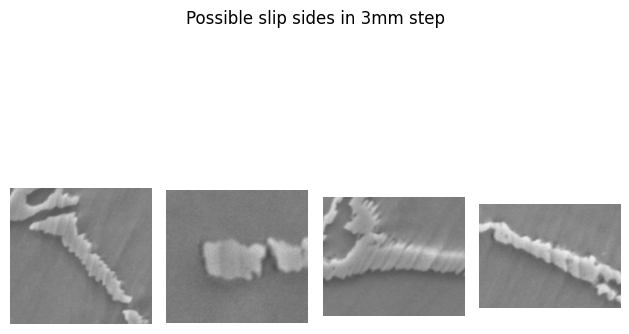

In [246]:
fig,ax=plt.subplots(1,4)
fig.suptitle('Possible slip sides in 3mm step')

for i in range(0,4):
    axi=ax[i]   
    sample=df.sample()
    # p=sel_window(sample,img.shape)
    img_p=sample.path.values[0]
    img=io.imread(img_path.joinpath(f'{img_p}.jpg'))
    # print(p)
    # p=sel_window(sample,img.shape)
    axi.imshow(img[sample.ymin.values[0]-50:sample.ymax.values[0]+50,sample.xmin.values[0]-50:sample.xmax.values[0]+50],cmap='gray')
    axi.axis('off')
    axi.set_ylabel('Decohesion')
# for i in range(0,4):
#     axi=ax[1,i]
#     sample=df_2.sample()
#     img_p=sample.folder.values
#     img=io.imread(img_p[0].parents[1].joinpath('crop').joinpath(f'{img_p[0].stem}.jpg'))
#     p=sel_window(sample,img.shape)
       
#     p=sel_window(sample,img.shape)
#     axi.imshow(img[p[2]:p[3],p[0]:p[1]],cmap='gray')
#     axi.axis('off')
#     axi.set_ylabel('Decohesion')
fig.tight_layout()

In [222]:
df

,index,name,pose,truncated,difficult,bndbox,xmin,ymin,xmax,ymax,parent_path,path
0,0,possible_slip,Unspecified,0,0,NaN,3246,2252,3348,2367,crop,pano_4kv_slip_events0000_stitch_lower_c001_r001
1,1,possible_slip,Unspecified,0,0,NaN,3607,2918,3649,2948,crop,pano_4kv_slip_events0000_stitch_lower_c001_r001
2,0,possible_slip,Unspecified,0,0,NaN,3246,2252,3348,2367,crop,pano_4kv_slip_events0000_stitch_lower_c001_r004
3,0,possible_slip,Unspecified,0,0,NaN,3246,2252,3348,2367,crop,pano_4kv_slip_events0000_stitch_lower_c002_r002
4,0,possible_slip,Unspecified,0,0,NaN,3246,2252,3348,2367,crop,pano_4kv_slip_events0000_stitch_lower_c005_r003
5,0,possible_slip,Unspecified,0,0,NaN,3246,2252,3348,2367,crop,pano_4kv_slip_events0000_stitch_lower_c006_r001
6,0,possible_slip,Unspecified,0,0,NaN,3246,2252,3348,2367,crop,pano_4kv_slip_events0000_stitch_lower_c006_r003
7,0,possible_slip,Unspecified,0,0,NaN,3246,2252,3348,2367,crop,pano_4kv_slip_events0000_stitch_lower_c007_r005
8,0,slip,Unspecified,0,0,NaN,3246,2252,3348,2367,crop,pano_4kv_slip_events0000_stitch_lower_c008_r000
9,1,possible_slip,Unspecified,0,0,NaN,3607,2918,3649,2948,crop,pano_4kv_slip_events0000_stitch_lower_c008_r000


In [211]:
sample=df.iloc[0]
plt.imshow(img[sample.xmin.values[0]-200:sample.xmax.values[0]+200,sample.ymin.values[0]-200:sample.ymax.values[0]+200],cmap='gray')


AttributeError: 'numpy.int64' object has no attribute 'values'

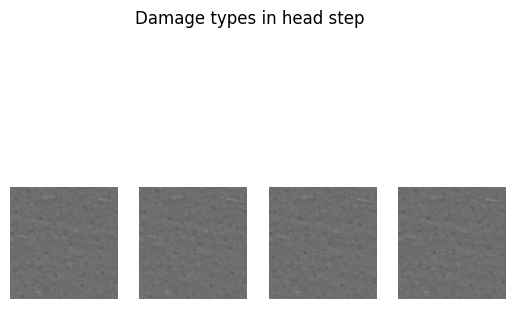

In [218]:
fig,ax=plt.subplots(1,4)
fig.suptitle('Damage types in head step')

for i in range(0,4):
    axi=ax[i]   
    sample=df.iloc[11]
    # p=sel_window(sample,img.shape)
    img_p=sample.path
    img=io.imread(img_path.joinpath(f'{img_p}.png'))
    # print(p)
    # p=sel_window(sample,img.shape)
    xmi=sample.xmin-100
    xma=sample.xmax+100
    ymi=sample.ymin-100
    yma=sample.ymax+100
    axi.imshow(img[ymi:yma,xmi:xma],cmap='gray')
    axi.axis('off')
    axi.set_ylabel('Decohesion')

In [221]:
sample

index                                                        0
name                                             possible_slip
pose                                               Unspecified
truncated                                                    0
difficult                                                    0
bndbox                                                     NaN
xmin                                                      3246
ymin                                                      2252
xmax                                                      3348
ymax                                                      2367
parent_path                                               crop
path           pano_4kv_slip_events0000_stitch_upper_c000_r000
Name: 11, dtype: object

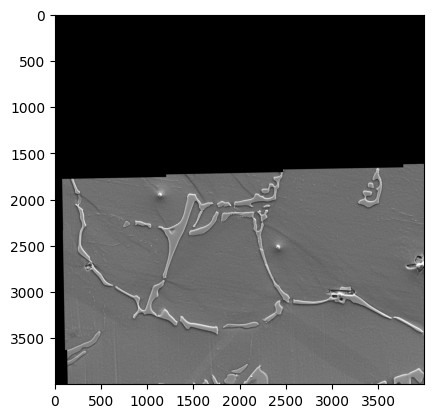

In [219]:
plt.imshow(img)

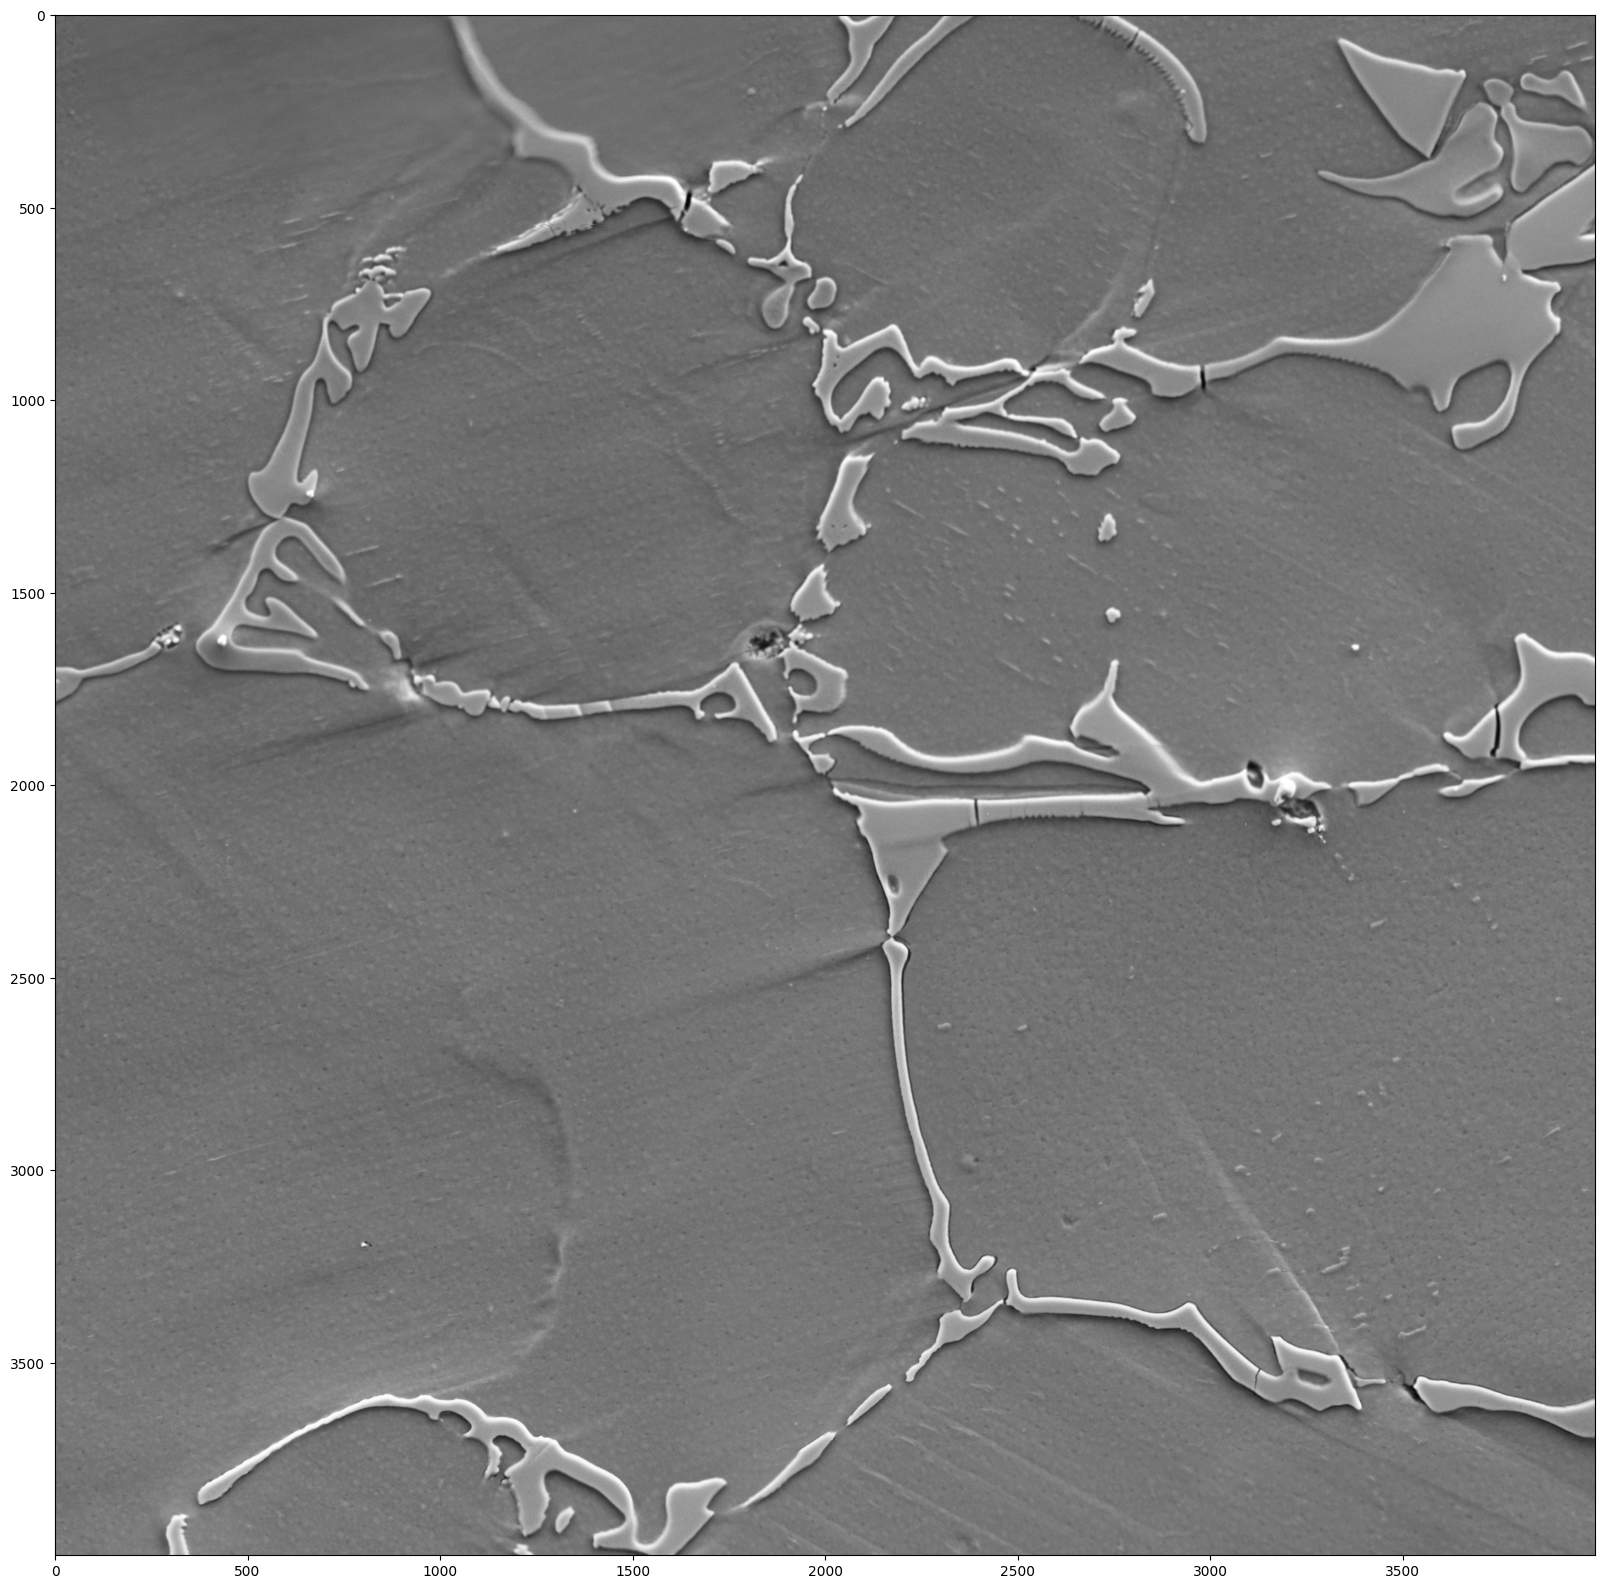

In [209]:
fig,ax=plt.subplots(figsize=(20,20))
plt.imshow(img)

In [150]:
sample.xmin.values[0],sample.xmax.values[0],sample.ymin.values[0],sample.ymax.values[0]

(3607, 3649, 2918, 2948)